In [1]:
!git clone https://github.com/Tanveer2719/NIDS_Coursework.git
%cd /kaggle/working/NIDS_Coursework/My_Code

Cloning into 'NIDS_Coursework'...
remote: Enumerating objects: 248, done.
remote: Counting objects: 100% (248/248), done.
remote: Compressing objects: 100% (159/159), done.
remote: Total 248 (delta 125), reused 207 (delta 84), pack-reused 0 (from 0)
Receiving objects: 100% (248/248), 205.71 KiB | 3.81 MiB/s, done.
Resolving deltas: 100% (125/125), done.
/kaggle/working/NIDS_Coursework/My_Code


In [2]:
!ls /kaggle/input

unsw-nb-15


In [3]:
import pandas as pd
import numpy as np

path = "/kaggle/input/unsw-nb-15/UNSW-NB15_combined.csv"

df = pd.read_csv(path)

print(df.shape)
df = df.drop(columns=['id', 'label'])
print(df.shape)

print(f"🧾 Unique class labels: {df['attack_cat'].unique()}")
df['label'] = df['attack_cat'].apply(lambda x: 0 if x == 'Normal' else 1)

print(f'Unique values for label {df["label"].unique()}')

df = df.drop(columns=["attack_cat"])
print(f'new shape{df.shape}')



# --------------------------- perform preprocessing--------------

from preprocess import Preprocess

# separate the features and labels so that the labesl are not encoded
labels = df['label']
features = df.drop(columns=['label'])

pp = Preprocess()
processed_features = pp.fit_transform_df_auto(df = features,n_categorical_levels=32, expected_categorical_format='onehot')

print(processed_features.shape)

# concat the features and the labels
processed_full_df = pd.concat([processed_features, labels], axis=1)

# Filter out categorical one-hot encoded columns
numerical_columns = [col for col in processed_full_df 
                     if not (col.startswith("proto_") or 
                             col.startswith("service_") or 
                             col.startswith("state_") or
                             col == 'label')]

target = processed_full_df['label']
features = processed_full_df.drop(columns=['label'])

(257673, 45)
(257673, 43)
🧾 Unique class labels: ['Normal' 'Backdoor' 'Analysis' 'Fuzzers' 'Shellcode' 'Reconnaissance'
 'Exploits' 'DoS' 'Worms' 'Generic']
Unique values for label [0 1]
new shape(257673, 43)
Encoding the 32 levels for proto
Encoding the 13 levels for service
Encoding the 11 levels for state
(257673, 95)


In [4]:
from record_level_embedding import RecordLevelEmbedder

embedder = RecordLevelEmbedder(selected_df = features, numerical_columns = numerical_columns, embed_dimension= 64)

embedded_df = embedder.transform_to_df()
embedded_df.head()


2025-08-17 14:52:34.488924: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755442354.822083      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755442354.916712      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


[INFO] Initializing RecordLevelEmbedder...
[INFO] Detecting categorical blocks...
[INFO] Detected 3 categorical blocks:
   - proto: 32 columns
   - service: 13 columns
   - state: 11 columns
[INFO] Embedder initialized with embedding dimension 64.
[INFO] Building Keras embedding model...
   - Adding numerical input: dur
   - Adding numerical input: spkts
   - Adding numerical input: dpkts
   - Adding numerical input: sbytes
   - Adding numerical input: dbytes
   - Adding numerical input: rate
   - Adding numerical input: sttl
   - Adding numerical input: dttl
   - Adding numerical input: sload
   - Adding numerical input: dload
   - Adding numerical input: sloss
   - Adding numerical input: dloss
   - Adding numerical input: sinpkt
   - Adding numerical input: dinpkt
   - Adding numerical input: sjit
   - Adding numerical input: djit
   - Adding numerical input: swin
   - Adding numerical input: stcpb
   - Adding numerical input: dtcpb
   - Adding numerical input: dwin
   - Adding nume

I0000 00:00:1755442371.219926      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1755442371.220639      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


[INFO] Projection complete. Output embedding shape: (64,)
[INFO] Model build complete.
[INFO] Preparing inputs for embedding. Number of rows: 257673
   - Prepared numerical input: dur
   - Prepared numerical input: spkts
   - Prepared numerical input: dpkts
   - Prepared numerical input: sbytes
   - Prepared numerical input: dbytes
   - Prepared numerical input: rate
   - Prepared numerical input: sttl
   - Prepared numerical input: dttl
   - Prepared numerical input: sload
   - Prepared numerical input: dload
   - Prepared numerical input: sloss
   - Prepared numerical input: dloss
   - Prepared numerical input: sinpkt
   - Prepared numerical input: dinpkt
   - Prepared numerical input: sjit
   - Prepared numerical input: djit
   - Prepared numerical input: swin
   - Prepared numerical input: stcpb
   - Prepared numerical input: dtcpb
   - Prepared numerical input: dwin
   - Prepared numerical input: tcprtt
   - Prepared numerical input: synack
   - Prepared numerical input: ackdat
  

I0000 00:00:1755442373.420759     109 service.cc:148] XLA service 0x7e2a6000a8b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755442373.422265     109 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1755442373.422285     109 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1755442373.475360     109 cuda_dnn.cc:529] Loaded cuDNN version 90300


  51/8053 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step    

I0000 00:00:1755442373.876484     109 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


8053/8053 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step
[INFO] Embedding complete. Output shape: (257673, 64)
[INFO] Embedding DataFrame ready.


,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,...,embed_54,embed_55,embed_56,embed_57,embed_58,embed_59,embed_60,embed_61,embed_62,embed_63
0,0.244900,-0.739141,-0.244098,-0.512176,-0.088571,-0.337144,0.567154,0.033319,0.538331,-0.049230,...,0.209351,0.452462,0.285047,0.379703,0.438062,-0.129147,0.344021,-0.834197,-0.392936,-0.723437
1,0.110808,-0.671032,0.028856,-0.575002,0.132906,-0.348525,0.738702,-0.019643,0.661901,-0.250809,...,0.224279,0.312303,0.107113,0.415263,0.287406,-0.214275,0.475250,-1.025287,-0.331796,-0.629645
2,0.134426,-0.633385,-0.087770,-0.425794,0.106792,-0.250416,0.625704,-0.066383,0.562162,-0.314680,...,0.117066,0.281179,0.133596,0.360809,0.269659,-0.260740,0.516990,-1.049734,-0.353673,-0.720569
3,0.324466,-0.594511,-0.219624,-0.105523,-0.147795,0.007674,0.298856,0.141987,0.424523,0.142578,...,-0.232162,0.494488,0.241181,0.373255,0.424235,-0.404199,0.364821,-1.021750,-0.045322,-0.270695
4,-0.017968,-0.431843,-0.065637,-0.437597,-0.058448,-0.084998,0.696161,-0.087475,0.656480,-0.132532,...,0.092800,0.451756,0.150516,0.623675,0.452655,-0.322112,0.391918,-1.027634,-0.378611,-0.419660


In [5]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

print(processed_full_df['label'].unique())

binary_target = (processed_full_df['label'] != 0).astype(int).values
unique, counts = np.unique(binary_target, return_counts=True)
print("Classes and their counts:")
for cls, cnt in zip(unique, counts):
    print(f"Class {cls}: {cnt}")

X_embed = embedded_df.values.astype(np.float32)  # shape: (num_samples, input_dim)
X_embed_seq = tf.expand_dims(X_embed, axis=1)  # shape: (batch_size, 1, embed_dim)
print(f"X_embed_seq : {X_embed_seq.shape}")

X_np = X_embed_seq.numpy() if hasattr(X_embed_seq, 'numpy') else np.array(X_embed_seq)

# Split data
X_temp, X_test, y_temp, y_test = train_test_split(X_np, binary_target, test_size=0.2, stratify=binary_target, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, stratify=y_temp, random_state=42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}")
print(f"y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")


[0 1]
Classes and their counts:
Class 0: 93000
Class 1: 164673
X_embed_seq : (257673, 1, 64)
X_train: (164910, 1, 64)
y_train: (164910,)
X_val: (41228, 1, 64)
y_val: (41228,)
X_test: (51535, 1, 64)
y_test: (51535,)


In [6]:
from CustomTransformer import TransformerBinaryClassifier
# Prepare inputs
input_shape = (1, X_embed.shape[1])

# Initialize model wrapper
model = TransformerBinaryClassifier(input_shape=input_shape)

# Print model summary
model.summary()

# Train
model.train(
    X_train, y_train,
    X_val, y_val,
    batch_size=32,
    epochs=50,
    patience=5
)




Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ record_input (InputLayer)       │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block_0_transformer_encoder     │ (None, 1, 64)          │       149,504 │
│ (TransformerEncoderBlock)       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block_1_transformer_encoder     │ (None, 1, 64)          │       149,504 │
│ (TransformerEncoderBlock)       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ slice_last (Lambda)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification_mlp_0_128        │ (None, 128)            │         8,320 │
│ (Dense)                         │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ binary_output (Dense)           │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 307,457 (1.17 MB)

 Trainable params: 307,457 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
5154/5154 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.8971 - loss: 0.2026 - val_accuracy: 0.9155 - val_loss: 0.1743
Epoch 2/50
5154/5154 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9140 - loss: 0.1744 - val_accuracy: 0.9108 - val_loss: 0.1948
Epoch 3/50
5154/5154 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9190 - loss: 0.1646 - val_accuracy: 0.9177 - val_loss: 0.1559
Epoch 4/50
5154/5154 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9204 - loss: 0.1600 - val_accuracy: 0.9232 - val_loss: 0.1551
Epoch 5/50
5154/5154 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9212 - loss: 0.1589 - val_accuracy: 0.9242 - val_loss: 0.1478
Epoch 6/50
5154/5154 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9204 - loss: 0.1573 - val_accuracy: 0.9245 - val_loss: 0.1488
Epoch 7/50
5154/5154 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9233 - loss: 0.1531 - val_accuracy: 0.9224 - val_loss: 0.1481
Epoch 8/50
5154/5154 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9246 - loss: 0

In [7]:
from sklearn.metrics import (
    f1_score, precision_score, recall_score, confusion_matrix,
    matthews_corrcoef, balanced_accuracy_score
)
import numpy as np

# Evaluate the model
results = model.evaluate(X_test, y_test)
print(f"Validation loss: {results[0]:.4f}, Validation accuracy: {results[1]:.4f}")

# Predict probabilities
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
print("Confusion Matrix:\n", cm)

# Extract metrics
if cm.shape == (2, 2):
    tn, fp, fn, tp = cm.ravel()

    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)  # Detection Rate
    f1 = f1_score(y_test, y_pred, zero_division=0)
    mcc = matthews_corrcoef(y_test, y_pred)
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0
    balanced_acc = balanced_accuracy_score(y_test, y_pred)

    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Detection Rate): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"MCC: {mcc:.4f}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")


1611/1611 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9324 - loss: 0.1322
Validation loss: 0.1324, Validation accuracy: 0.9335
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Confusion Matrix:
 [[16906  1694]
 [ 1731 31204]]
F1 Score: 0.9480
Precision: 0.9485
Recall (Detection Rate): 0.9474
Specificity: 0.9089
MCC: 0.8560
Balanced Accuracy: 0.9282


In [8]:
print(X_test.shape)
print(y_test.shape)

(51535, 1, 64)
(51535,)


## Check the Model Using Crafted Attacks

In [9]:
import tensorflow as tf

@tf.function
def fgsm_attack_tf(model, inputs, labels, epsilon=0.05, clip_min=-1.5, clip_max=1.5):
    inputs = tf.convert_to_tensor(inputs, dtype=tf.float32)
    labels = tf.reshape(tf.convert_to_tensor(labels, dtype=tf.float32), (-1, 1))

    with tf.GradientTape() as tape:
        tape.watch(inputs)
        predictions = model(inputs, training=False)
        loss = tf.keras.losses.binary_crossentropy(labels, predictions)
        loss = tf.reduce_mean(loss)

    gradients = tape.gradient(loss, inputs)
    signed_grad = tf.sign(gradients)
    x_adv = inputs + epsilon * signed_grad
    x_adv = tf.clip_by_value(x_adv, clip_min, clip_max)
    return x_adv


@tf.function
def pgd_attack_tf(model, inputs, labels, epsilon=0.05, alpha=0.01, num_iter=10, clip_min=-1.5, clip_max=1.5):
    inputs = tf.convert_to_tensor(inputs, dtype=tf.float32)
    labels = tf.reshape(tf.convert_to_tensor(labels, dtype=tf.float32), (-1, 1))

    x_adv = tf.identity(inputs)

    for _ in tf.range(num_iter):
        with tf.GradientTape() as tape:
            tape.watch(x_adv)
            predictions = model(x_adv, training=False)
            loss = tf.keras.losses.binary_crossentropy(labels, predictions)
            loss = tf.reduce_mean(loss)

        gradients = tape.gradient(loss, x_adv)
        x_adv = x_adv + alpha * tf.sign(gradients)
        x_adv = tf.clip_by_value(x_adv, inputs - epsilon, inputs + epsilon)
        x_adv = tf.clip_by_value(x_adv, clip_min, clip_max)

    return x_adv


@tf.function
def mi_fgsm_attack(model, inputs, labels, epsilon=0.05, alpha=0.01, steps=40, decay=1.0, clip_min=-1.5, clip_max=1.5):
    inputs = tf.convert_to_tensor(inputs, dtype=tf.float32)
    labels = tf.reshape(tf.convert_to_tensor(labels, dtype=tf.float32), (-1, 1))

    x_adv = tf.identity(inputs)
    g = tf.zeros_like(inputs)

    for _ in tf.range(steps):
        with tf.GradientTape() as tape:
            tape.watch(x_adv)
            logits = model(x_adv, training=False)
            loss = tf.keras.losses.binary_crossentropy(labels, logits)
            loss = tf.reduce_mean(loss)

        grad = tape.gradient(loss, x_adv)
        # Normalize gradient
        grad_norm = tf.reduce_mean(tf.abs(grad), axis=list(range(1, len(grad.shape))), keepdims=True)
        grad = grad / (grad_norm + 1e-8)

        g = decay * g + grad
        x_adv = x_adv + alpha * tf.sign(g)
        x_adv = tf.clip_by_value(x_adv, inputs - epsilon, inputs + epsilon)
        x_adv = tf.clip_by_value(x_adv, clip_min, clip_max)

    return x_adv



from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

def evaluate_metrics(y_true, y_pred):
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        numerator = tp * tn - fp * fn
        denominator = ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
        mcc = numerator / (denominator + 1e-10)
        specificity = tn / (tn + fp + 1e-10)
        balanced_acc = (recall + specificity) / 2
    else:
        mcc = 0
        balanced_acc = 0
        specificity = 0

    return {
        'f1': f1,
        'precision': precision,
        'recall': recall,
        'mcc': mcc,
        'specificity': specificity,
        'balanced_accuracy': balanced_acc
    }



In [10]:
def evaluate_model(model, X, y,epsilon_list=[0.01, 0.03, 0.05, 0.07]):
    import tensorflow as tf
    import numpy as np

    X_clean = X
    x_clean_tf = tf.convert_to_tensor(X_clean, dtype=tf.float32)
    y_tf = tf.convert_to_tensor(y, dtype=tf.float32)

    # ---------------- Clean Evaluation ----------------
    print("✅ Clean Evaluation:")
    y_pred_clean = (model.predict(x_clean_tf) > 0.5).astype(int).flatten()
    clean_metrics = evaluate_metrics(y, y_pred_clean)
    print(f"  F1: {clean_metrics['f1']:.4f}, Precision: {clean_metrics['precision']:.4f}, Recall: {clean_metrics['recall']:.4f}, MCC: {clean_metrics.get('mcc', 'N/A')}, Specificity: {clean_metrics.get('specificity', 'N/A')}, Balanced Acc: {clean_metrics.get('balanced_accuracy', 'N/A')}")

    # ---------------- FGSM Evaluation ----------------
    print("\nFGSM Attack Evaluation")
    fgsm_results = []
    for eps in epsilon_list:
        x_adv = fgsm_attack_tf(model.model, x_clean_tf, y_tf, epsilon=eps )
        x_adv_tf = tf.convert_to_tensor(x_adv.numpy(), dtype=tf.float32)
        y_pred_adv = (model.predict(x_adv_tf) > 0.5).astype(int).flatten()

        adv_metrics = evaluate_metrics(y, y_pred_adv)
        fgsm_results.append({'epsilon': eps, 'adversarial': adv_metrics})

        print(f"  FGSM ε={eps:.2f} → F1: {adv_metrics['f1']:.4f}, Precision: {adv_metrics['precision']:.4f}, Recall: {adv_metrics['recall']:.4f}, MCC: {adv_metrics.get('mcc', 'N/A')}, Specificity: {adv_metrics.get('specificity', 'N/A')}, Balanced Acc: {adv_metrics.get('balanced_accuracy', 'N/A')}")

    # ---------------- PGD Evaluation ----------------
    print("\nPGD Attack Evaluation:")
    pgd_results = []
    for eps in epsilon_list:
        alpha = eps * 0.2
        x_adv = pgd_attack_tf(model.model, x_clean_tf, y_tf, epsilon=eps, alpha=alpha, num_iter=10)
        x_adv_tf = tf.convert_to_tensor(x_adv.numpy(), dtype=tf.float32)
        y_pred_adv = (model.predict(x_adv_tf) > 0.5).astype(int).flatten()

        adv_metrics = evaluate_metrics(y, y_pred_adv)
        pgd_results.append({'epsilon': eps, 'adversarial': adv_metrics})

        print(f"  FGSM ε={eps:.2f} → F1: {adv_metrics['f1']:.4f}, Precision: {adv_metrics['precision']:.4f}, Recall: {adv_metrics['recall']:.4f}, MCC: {adv_metrics.get('mcc', 'N/A')}, Specificity: {adv_metrics.get('specificity', 'N/A')}, Balanced Acc: {adv_metrics.get('balanced_accuracy', 'N/A')}")

    # ---------------- MI-FGSM Evaluation ----------------
    print("\nMI-FGSM Attack Evaluation:")
    mifgsm_results = []
    for eps in epsilon_list:
        alpha = eps * 0.2
        steps = 10   
        decay = 1.0   

        x_adv = mi_fgsm_attack(model.model, x_clean_tf, y_tf, epsilon=eps, alpha=alpha, steps=steps, decay=decay)
        x_adv_tf = tf.convert_to_tensor(x_adv.numpy(), dtype=tf.float32)
        y_pred_adv = (model.predict(x_adv_tf) > 0.5).astype(int).flatten()

        adv_metrics = evaluate_metrics(y, y_pred_adv)
        mifgsm_results.append({'epsilon': eps, 'adversarial': adv_metrics})

        print(f"  FGSM ε={eps:.2f} → F1: {adv_metrics['f1']:.4f}, Precision: {adv_metrics['precision']:.4f}, Recall: {adv_metrics['recall']:.4f}, MCC: {adv_metrics.get('mcc', 'N/A')}, Specificity: {adv_metrics.get('specificity', 'N/A')}, Balanced Acc: {adv_metrics.get('balanced_accuracy', 'N/A')}")

    return fgsm_results, pgd_results, mifgsm_results
        


In [11]:
print(X_test.shape)
fgsm_full, pgd_full, mi_full = evaluate_model(model, X_test, y_test)

malicious_mask = (y_test == 1)
X_malicious = X_test[malicious_mask]
y_malicious = y_test[malicious_mask]
fgsm_mal, pgd_mal, mi_mal = evaluate_model(model, X_malicious, y_malicious)


(51535, 1, 64)
✅ Clean Evaluation:
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
  F1: 0.9480, Precision: 0.9485, Recall: 0.9474, MCC: 0.8559971277647491, Specificity: 0.9089247311827909, Balanced Acc: 0.9281833311295767

FGSM Attack Evaluation
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
  FGSM ε=0.01 → F1: 0.8950, Precision: 0.8884, Recall: 0.9018, MCC: 0.7054331464745552, Specificity: 0.7994086021505334, Balanced Acc: 0.8505924140250163
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
  FGSM ε=0.03 → F1: 0.8398, Precision: 0.8233, Recall: 0.8570, MCC: 0.5407039535352122, Specificity: 0.6743010752688137, Balanced Acc: 0.7656460591161132
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
  FGSM ε=0.05 → F1: 0.7064, Precision: 0.7160, Recall: 0.6972, MCC: 0.20546589201428975, Specificity: 0.5102150537634381, Balanced Acc: 0.6037032457218587
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
  FGSM ε=0.07 → F1: 0.6237, Precision: 0.6723, Recall: 0.5816, MCC: 0.07692971572522951, Specificity: 0.4980107526881694, B

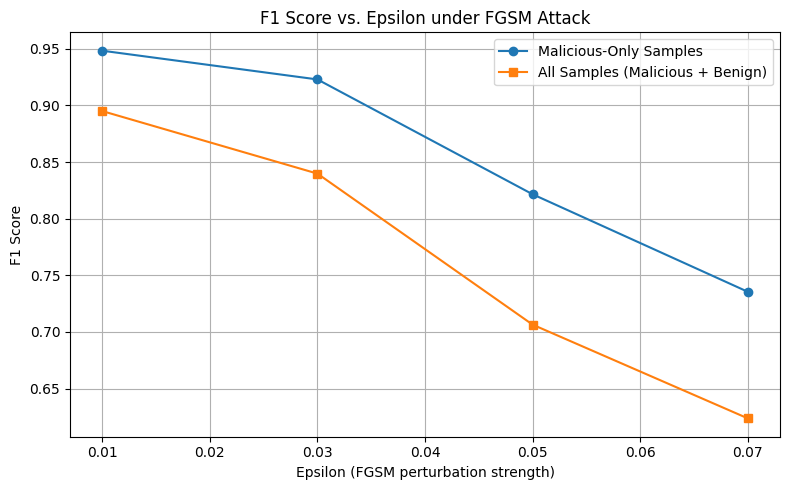

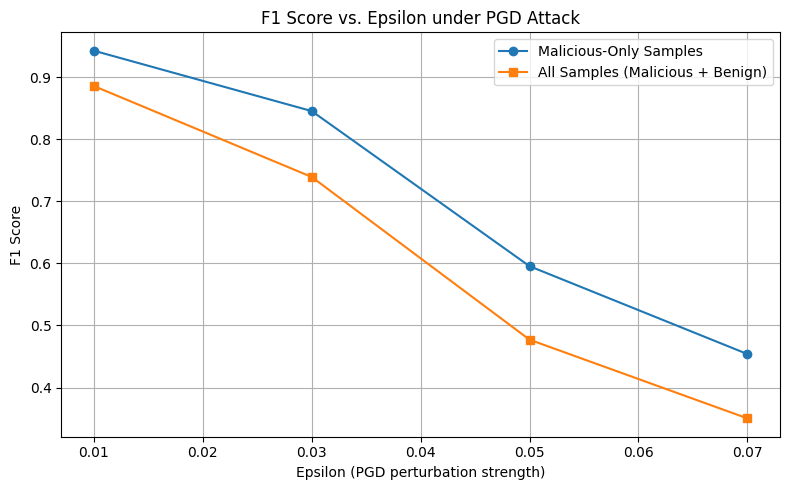

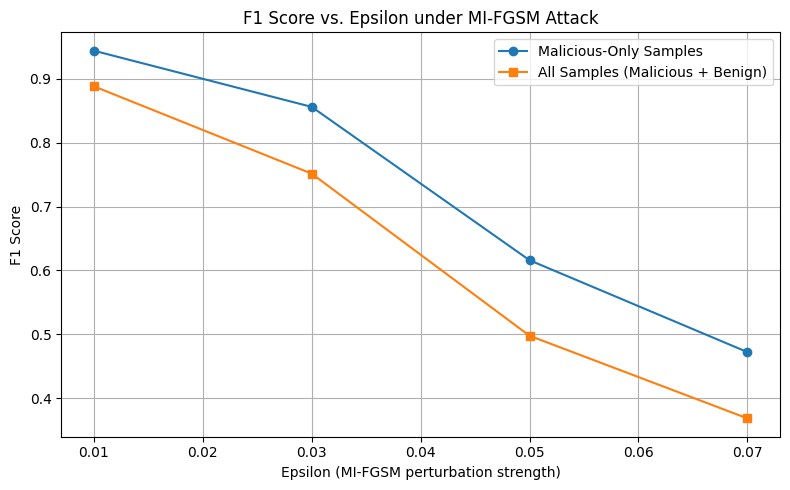

In [12]:
import matplotlib.pyplot as plt

def plot_results(f1_malicious_list, f1_all_list, epsilons, a_type="PGD"):
    plt.figure(figsize=(8, 5))
    plt.plot(epsilons, f1_malicious_list, marker='o', label='Malicious-Only Samples')
    plt.plot(epsilons, f1_all_list, marker='s', label='All Samples (Malicious + Benign)')
    plt.xlabel(f"Epsilon ({a_type} perturbation strength)")
    plt.ylabel("F1 Score")
    plt.title(f"F1 Score vs. Epsilon under {a_type} Attack")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

epsilons = [0.01, 0.03, 0.05, 0.07]

# plot the fgsm curve
f1_malicious_scores = [entry['adversarial']['f1'] for entry in fgsm_mal]
f1_all_scores = [entry['adversarial']['f1'] for entry in fgsm_full]
plot_results(f1_malicious_scores, f1_all_scores, epsilons=epsilons, a_type='FGSM')


# plot the PGD Curve
f1_malicious_scores_pgd = [entry['adversarial']['f1'] for entry in pgd_mal]
f1_all_scores_pgd = [entry['adversarial']['f1'] for entry in pgd_full]

plot_results(f1_malicious_scores_pgd, f1_all_scores_pgd, epsilons=epsilons, a_type='PGD')

# MI-FGSM Plot
f1_malicious_scores_mi = [entry['adversarial']['f1'] for entry in mi_mal]
f1_all_scores_mi = [entry['adversarial']['f1'] for entry in mi_full]

plot_results(f1_malicious_scores_mi, f1_all_scores_mi, epsilons=epsilons, a_type='MI-FGSM')